In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywaffle as pyw 

In [2]:
df = pd.read_csv("epl_final (completed).csv")

In [3]:
df.head(2)

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,8/19/2000,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,8/19/2000,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0


In [4]:
# Placemenet of Premier League Big 6 through out the matchdays  - Line Graph --done
# Month With the Most Goals Scored -- done 
# Most Fouls Committed by a Team (Home and Away) -- done 
# Shot conversion rate for the teams this year (To find out the highesh accuracy)--done
# Home Wins and Away Wins ---done
# Clean Sheets -- done

In [5]:
# Creating a new dataframe for new season
season_24_25 = df[df["Season"] == "2024/25"]

In [6]:
season_24_25

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
9030,2024/25,8/16/2024,Man United,Fulham,1,0,H,0,0,D,...,5,2,7,8,12,10,2,3,0,0
9031,2024/25,8/17/2024,Ipswich,Liverpool,0,2,A,0,0,D,...,2,5,2,10,9,18,3,1,0,0
9032,2024/25,8/17/2024,Arsenal,Wolves,2,0,H,1,0,H,...,6,3,8,2,17,14,2,2,0,0
9033,2024/25,8/17/2024,Everton,Brighton,0,3,A,0,1,A,...,1,5,1,5,8,8,1,1,1,0
9034,2024/25,8/17/2024,Newcastle,Southampton,1,0,H,1,0,H,...,1,4,3,12,15,16,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9405,2024/25,5/25/2025,Newcastle,Everton,0,1,A,0,0,D,...,6,6,12,3,12,9,1,4,0,0
9406,2024/25,5/25/2025,Nott'm Forest,Chelsea,0,1,A,0,0,D,...,2,2,7,4,10,11,2,2,0,0
9407,2024/25,5/25/2025,Southampton,Arsenal,1,2,A,0,1,A,...,2,7,5,8,7,8,0,0,0,0
9408,2024/25,5/25/2025,Tottenham,Brighton,1,4,A,1,0,H,...,2,8,2,11,9,7,3,1,0,0


In [7]:
def point_calculator(team):
    results = []

    for idx, row in season_24_25.iterrows():
        if row["HomeTeam"] == team:
            if row["FullTimeResult"] == "H":
                results.append("W")
            elif row["FullTimeResult"] == "A":
                results.append("L")
            elif row["FullTimeResult"] == "D":
                results.append("D")
        elif row["AwayTeam"] == team:
            if row["FullTimeResult"] == "A":
                results.append("W")
            elif row["FullTimeResult"] == "H":
                results.append("L")
            elif row["FullTimeResult"] == "D":
                results.append("D")

    return results


In [8]:
LFC = point_calculator("Liverpool")
MCY = point_calculator("Man City")
ARS = point_calculator("Arsenal")
TOT = point_calculator("Tottenham")
MUN = point_calculator("Man United")
CHE = point_calculator("Chelsea")

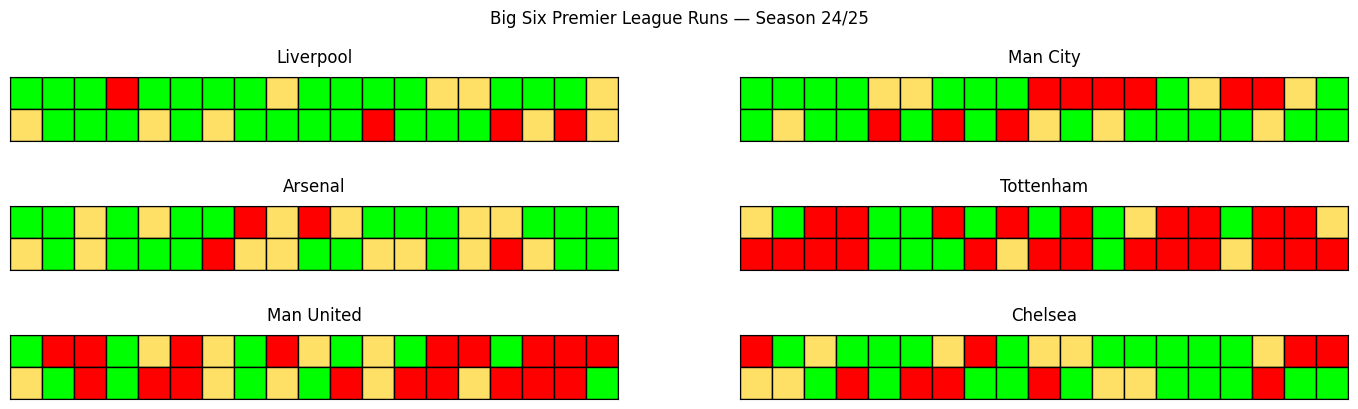

In [9]:

colors_map = {
    "W": "#00ff00",     
    "D": "#ffe066",    
    "L": "#FF0000"    
}

teams = {
    "Liverpool": LFC,
    "Man City": MCY,
    "Arsenal": ARS,
    "Tottenham": TOT,
    "Man United": MUN,
    "Chelsea": CHE
}

cols = 19
rows = int(np.ceil(len(LFC) / cols))
square_size = 0.9  # smaller squares

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(cols * square_size * 0.8, rows * square_size * 0.8 * 3))

axes = ax.flatten()

for ax, (team_name, results) in zip(axes, teams.items()):
    ax.set_xlim(0, cols * square_size)
    ax.set_ylim(0, rows * square_size)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    for i, outcome in enumerate(results):
        row = i // cols
        col = i % cols
        color = colors_map.get(outcome, "#cccccc")
        rect = plt.Rectangle((col * square_size, (rows - 1 - row) * square_size), 
                             square_size, square_size, facecolor=color, edgecolor='black')
        ax.add_patch(rect)

    ax.set_title(team_name, fontsize=12, pad=10)

fig.suptitle('Big Six Premier League Runs — Season 24/25', fontsize=12, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.savefig("pl_runs.png", dpi=300, bbox_inches='tight')
plt.show()


In [10]:
# Most Goals Scored in a Month

season_24_25["MatchDate"] = pd.to_datetime(season_24_25["MatchDate"])

C:\Users\user\AppData\Local\Temp\ipykernel_3580\1836113310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_24_25["MatchDate"] = pd.to_datetime(season_24_25["MatchDate"])


In [11]:
Months = season_24_25["MatchDate"].dt.month_name().str[:3]
matches = (season_24_25.groupby(Months)[["FullTimeHomeGoals","FullTimeAwayGoals"]]).sum()
matches["Total_Goals"] = matches["FullTimeHomeGoals"] + matches["FullTimeAwayGoals"]

In [12]:
matches.rename(columns={
    "FullTimeHomeGoals": "Home",
    "FullTimeAwayGoals": "Away"
}, inplace=True)

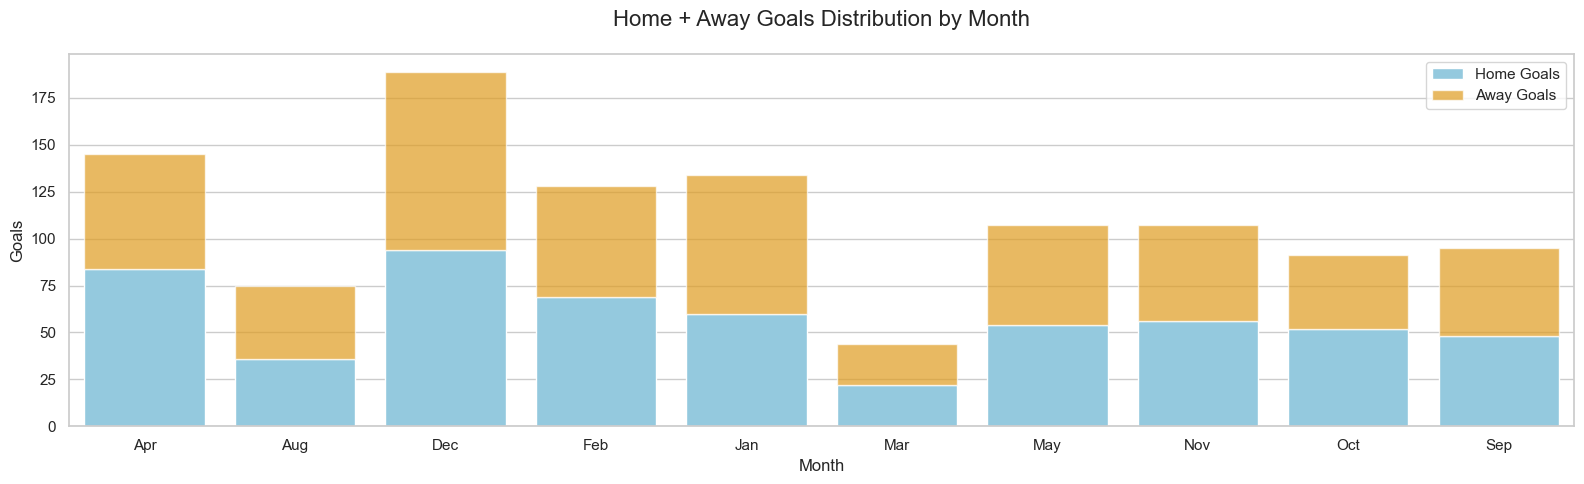

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 5))
sns.barplot(x="MatchDate", y="Home", data=matches, label="Home Goals", color="skyblue")
sns.barplot(x="MatchDate", y="Away", data=matches, label="Away Goals", color="orange", alpha=0.7, bottom=matches["Home"])

# Labels and title
plt.title("Home + Away Goals Distribution by Month", fontsize = 16,pad=20)
plt.ylabel("Goals")
plt.xlabel("Month")
plt.legend()
plt.tight_layout()
plt.savefig("goals_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# # Most Fouls Committed by a Team (Home and Away)

In [15]:
fouls = (season_24_25.groupby("AwayTeam")[["HomeFouls","AwayFouls","HomeYellowCards","AwayYellowCards","HomeRedCards","AwayRedCards"]]).sum() | (season_24_25.groupby("HomeTeam")[["HomeFouls","AwayFouls","HomeYellowCards","AwayYellowCards","HomeRedCards","AwayRedCards"]]).sum()

In [16]:
# Group by HomeTeam and sum relevant columns
home_fouls = season_24_25.groupby("HomeTeam")[["HomeFouls", "HomeYellowCards", "HomeRedCards"]].sum()
home_fouls.columns = ["Fouls", "YellowCards", "RedCards"]

# Group by AwayTeam and sum relevant columns
away_fouls = season_24_25.groupby("AwayTeam")[["AwayFouls", "AwayYellowCards", "AwayRedCards"]].sum()
away_fouls.columns = ["Fouls", "YellowCards", "RedCards"]

# Combine home and away stats by summing, fill NaNs with 0
total_fouls = home_fouls.add(away_fouls, fill_value=0).reset_index()

total_fouls.rename(columns={
    "HomeTeam" : "Team"
},inplace=True)

total_fouls.columns

Index(['Team', 'Fouls', 'YellowCards', 'RedCards'], dtype='object')

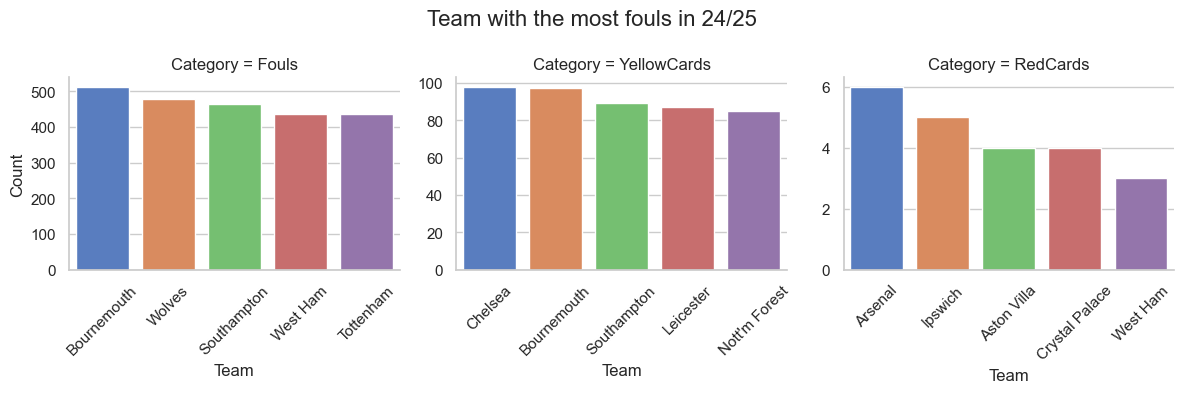

In [17]:
melted = pd.melt(total_fouls, id_vars="Team", 
                 value_vars=["Fouls", "YellowCards", "RedCards"],
                 var_name="Category", value_name="Count")


top_5_teams = (
    melted.sort_values("Count", ascending=False)
          .groupby("Category")
          .head(5)
          
)


g = sns.FacetGrid(top_5_teams, col="Category", sharex=False, sharey=False, height=4, aspect=1)
g.map_dataframe(sns.barplot,x="Team", y="Count", palette="muted",legend=False,hue="Team",)


for ax in g.axes.flat:
    ax.tick_params(axis="x",labelrotation=45)
    


g.fig.suptitle("Team with the most fouls in 24/25", fontsize=16)
plt.tight_layout()
g.savefig("fouls.png", dpi=300, bbox_inches='tight')
plt.show()


In [18]:
# Shot conversion rate for the teams this year (To find out the highesh accuracy)

# Formula for Shot Conversion- Goals scored / Total shots


In [19]:
home_goals = season_24_25.groupby("HomeTeam")["FullTimeHomeGoals"].sum()
away_goals = season_24_25.groupby("AwayTeam")["FullTimeAwayGoals"].sum()

away_total_shots = season_24_25.groupby("AwayTeam")["AwayShots"].sum()
home_total_shots = season_24_25.groupby("HomeTeam")["HomeShots"].sum()

away_total_shots_on_target = season_24_25.groupby("AwayTeam")["AwayShotsOnTarget"].sum()
home_total_shots_on_target = season_24_25.groupby("HomeTeam")["HomeShotsOnTarget"].sum()


total_shots_on_target  = home_total_shots_on_target.add(away_total_shots_on_target,fill_value=0)
total_shots_on_target = total_shots_on_target.rename("Shots_on_Target").reset_index()
total_shots_on_target.rename(columns={"HomeTeam": "Team"}, inplace=True)


total_shots  = home_total_shots.add(away_total_shots,fill_value=0)
total_shots = total_shots.rename("Total_Shots").reset_index()
total_shots.rename(columns={"HomeTeam": "Team"}, inplace=True)


total_goals = home_goals.add(away_goals, fill_value=0)
total_goals = total_goals.rename("Total_Goals").reset_index()
total_goals.rename(columns={"HomeTeam": "Team"}, inplace=True)


# Now Creating a dataframe

merge_df = pd.merge(total_goals, total_shots, on="Team")
shot_frame  =  pd.merge(merge_df, total_shots_on_target, on="Team")

In [20]:
shot_frame["shot_coversion_rate"] = shot_frame["Total_Goals"]/shot_frame["Total_Shots"]
shot_frame["shot_accuracy"] = shot_frame["Shots_on_Target"]/shot_frame["Total_Shots"]
shot_frame["missed_shots"] = (shot_frame["Total_Shots"]-shot_frame["Shots_on_Target"])/shot_frame["Total_Shots"]
shot_frame

,Team,Total_Goals,Total_Shots,Shots_on_Target,shot_coversion_rate,shot_accuracy,missed_shots
0,Arsenal,69,544,187,0.126838,0.343750,0.656250
1,Aston Villa,58,483,170,0.120083,0.351967,0.648033
2,Bournemouth,58,575,203,0.100870,0.353043,0.646957
3,Brentford,66,441,184,0.149660,0.417234,0.582766
4,Brighton,66,529,191,0.124764,0.361059,0.638941
5,Chelsea,64,594,218,0.107744,0.367003,0.632997
6,Crystal Palace,51,515,186,0.099029,0.361165,0.638835
7,Everton,42,405,144,0.103704,0.355556,0.644444
8,Fulham,54,519,172,0.104046,0.331407,0.668593
9,Ipswich,36,374,127,0.096257,0.339572,0.660428


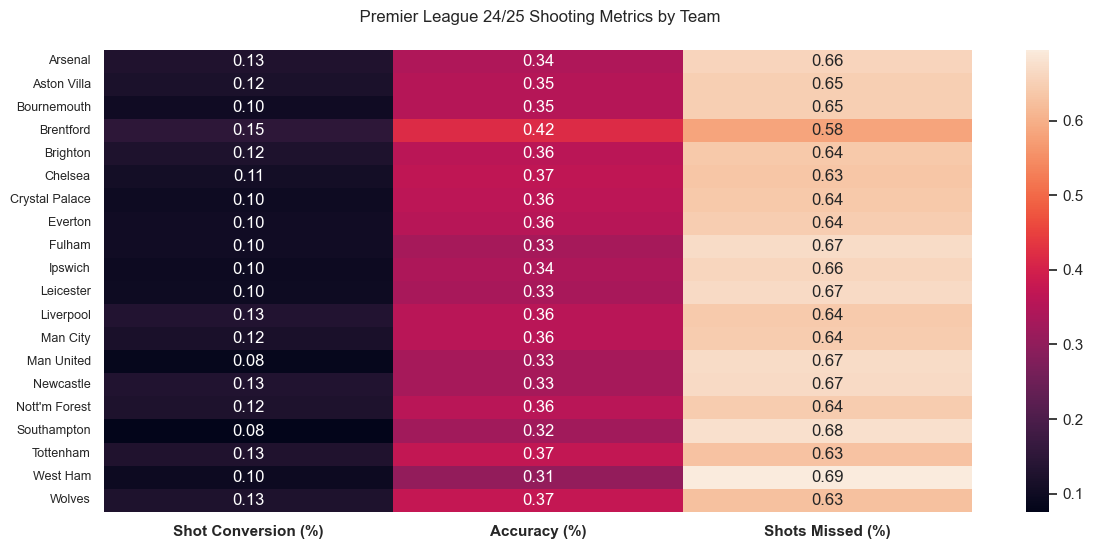

In [21]:
heat_df = shot_frame.set_index("Team")[["shot_coversion_rate", "shot_accuracy", "missed_shots"]]

heat_df.rename(columns={
    "shot_coversion_rate": "Shot Conversion (%)",
    "shot_accuracy": "Accuracy (%)",
    "missed_shots": "Shots Missed (%)"
}, inplace=True)


plt.figure(figsize=(14,6))
sns.heatmap(heat_df, annot=True, cmap="rocket", fmt=".2f",  
    )
plt.title(" Premier League 24/25 Shooting Metrics by Team",pad=20)
plt.xticks(fontsize=11, fontweight='semibold')
plt.yticks(fontsize=9, fontweight='light')
plt.xlabel("")
plt.ylabel("")
plt.savefig("accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Team That Scored Most Goals in Away Matches and Home Matches 

In [23]:
home_wins = season_24_25[season_24_25["FullTimeResult"] == "H"].groupby("HomeTeam").size()
away_wins = season_24_25[season_24_25["FullTimeResult"] == "A"].groupby("AwayTeam").size()

total_home_matches = season_24_25["HomeTeam"].value_counts()
total_away_matches = season_24_25["AwayTeam"].value_counts()

#Creating Frame
wins_frame = pd.DataFrame({
    "Home Wins":home_wins,
    "Away Wins":away_wins,
    "Total Home Matches":total_home_matches,
    "Total Away Matches": total_away_matches,
}).fillna(0).astype(int)

wins_frame["Home Win %"] = round(wins_frame["Home Wins"] / wins_frame["Total Home Matches"],2)
wins_frame["Away Win %"] = round(wins_frame["Away Wins"] / wins_frame["Total Away Matches"],2)

wins_frame = wins_frame.reset_index()
wins_frame = wins_frame.rename(columns={"index": "Team"}) 

In [24]:
wins_frame

,Team,Home Wins,Away Wins,Total Home Matches,Total Away Matches,Home Win %,Away Win %
0,Arsenal,11,9,19,19,0.58,0.47
1,Aston Villa,11,8,19,19,0.58,0.42
2,Bournemouth,8,7,19,19,0.42,0.37
3,Brentford,9,7,19,19,0.47,0.37
4,Brighton,8,8,19,19,0.42,0.42
5,Chelsea,12,8,19,19,0.63,0.42
6,Crystal Palace,6,7,19,19,0.32,0.37
7,Everton,5,6,19,19,0.26,0.32
8,Fulham,7,8,19,19,0.37,0.42
9,Ipswich,1,3,19,19,0.05,0.16


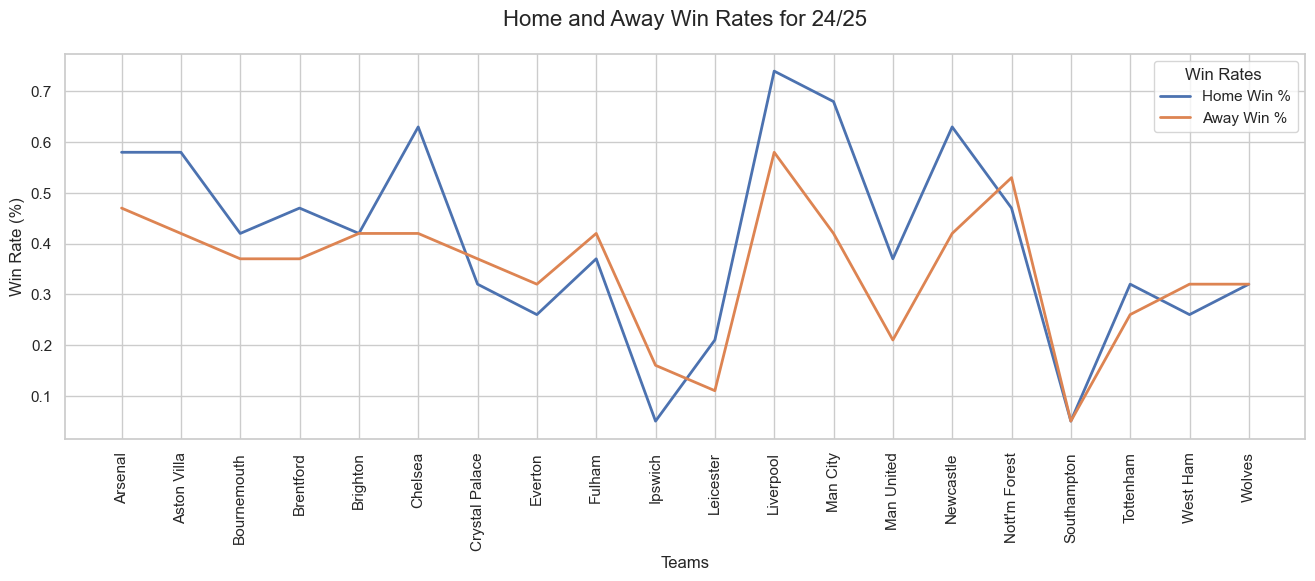

In [25]:
plt.figure(figsize=(16,5))

sns.lineplot(data =wins_frame ,x="Team",y="Home Win %", label="Home Win %", linewidth=2)
sns.lineplot(data =wins_frame ,x="Team",y="Away Win %", label="Away Win %", linewidth=2)

plt.xlabel("Teams")
plt.ylabel("Win Rate (%)")
plt.tick_params(axis="x",labelrotation=90)
plt.title("Home and Away Win Rates for 24/25",fontsize=16,pad=20)
plt.legend(title="Win Rates ",loc="upper right")
plt.savefig("win _rates.png", dpi=900, bbox_inches='tight')
plt.show()

In [26]:
# Team that kept the clean sheets
df.columns

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')

In [27]:
home_grouped_sheets = season_24_25[season_24_25["FullTimeAwayGoals"] == 0]
home_clean_sheets = home_grouped_sheets.groupby("HomeTeam").size()

away_grouped_sheets = season_24_25[season_24_25["FullTimeHomeGoals"] == 0]
away_clean_sheets = away_grouped_sheets.groupby("AwayTeam").size()

clean_sheets_frame = pd.DataFrame({
    "Home Clean": home_clean_sheets,
    "Away Clean" : away_clean_sheets
}).fillna(0).astype(int)

clean_sheets_frame = clean_sheets_frame.reset_index()
clean_sheets_frame = clean_sheets_frame.rename(columns={"index":"Teams"})


In [28]:
clean_sheets_frame
clean_sheets_melted  = pd.melt(clean_sheets_frame, id_vars="Teams", 
                 value_vars=["Home Clean", "Away Clean"],
                 var_name="Category", value_name="Count")
clean_sheets_melted

,Teams,Category,Count
0,Arsenal,Home Clean,7
1,Aston Villa,Home Clean,4
2,Bournemouth,Home Clean,7
3,Brentford,Home Clean,1
4,Brighton,Home Clean,3
5,Chelsea,Home Clean,6
6,Crystal Palace,Home Clean,4
7,Everton,Home Clean,6
8,Fulham,Home Clean,2
9,Ipswich,Home Clean,1


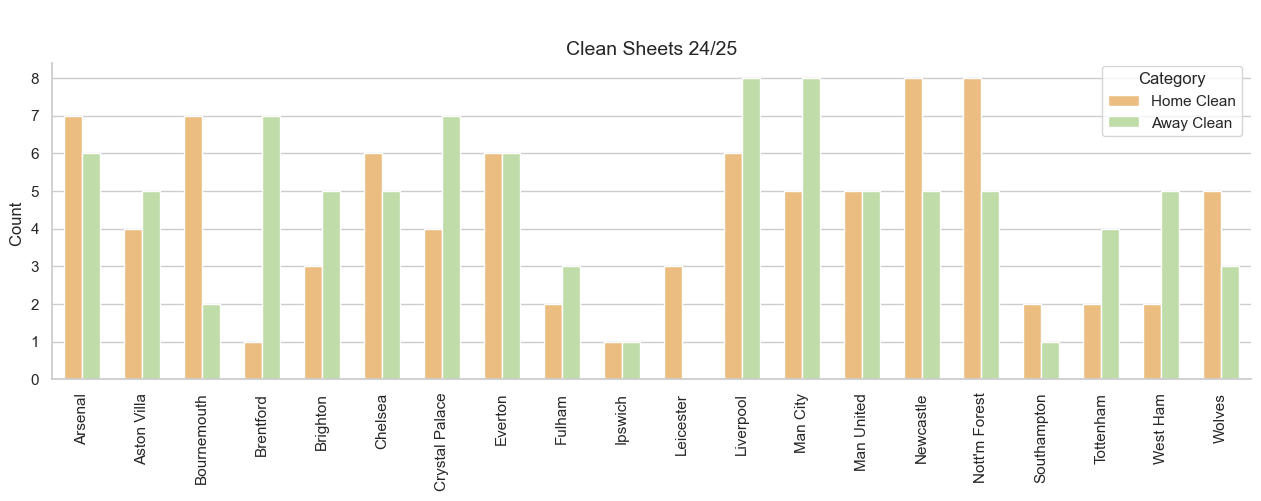

In [29]:

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=clean_sheets_melted, kind="bar",
    x="Teams", y="Count", hue="Category",
    errorbar="sd", palette="Spectral", alpha=1, 
    height=4,       
    aspect=3.2,
       width=0.6
)
g.despine(top=True)
g.set_axis_labels("", "Count ")
g._legend.set_bbox_to_anchor((0.88, 1))
g._legend.set_frame_on(True)
g.ax.set_title("Clean Sheets 24/25", fontsize=14)
g.ax.tick_params(axis="x",labelrotation=90)
g.savefig("clean_sheets_plot.png", dpi=900, bbox_inches='tight')
plt.show()